#**Business Case**

You are working at **24Seven**, which has different stores buying various products. Based on the purchase history :
- you want to divide the stores into classes for better inventory management and customer handling.



Lets now load the data


In [61]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 52.7MB/s]


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|


In [63]:
df = pd.read_csv('multiclass.csv')

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [64]:
df.shape

(440, 8)

Converting ```Region``` a **Categorical data** to  ```One Hot Encoding``` matrix



In [65]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,False,False,True,False,True,False
1,7057,9810,9568,1762,3293,1776,False,False,True,False,True,False
2,6353,8808,7684,2405,3516,7844,False,False,True,False,True,False
3,13265,1196,4221,6404,507,1788,False,False,True,True,False,False
4,22615,5410,7198,3915,1777,5185,False,False,True,True,False,False


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
 6   Region_1          440 non-null    bool 
 7   Region_2          440 non-null    bool 
 8   Region_3          440 non-null    bool 
 9   class_1           440 non-null    bool 
 10  class_2           440 non-null    bool 
 11  class_3           440 non-null    bool 
dtypes: bool(6), int64(6)
memory usage: 23.3 KB


In [67]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

Visualizing the data using PCA

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


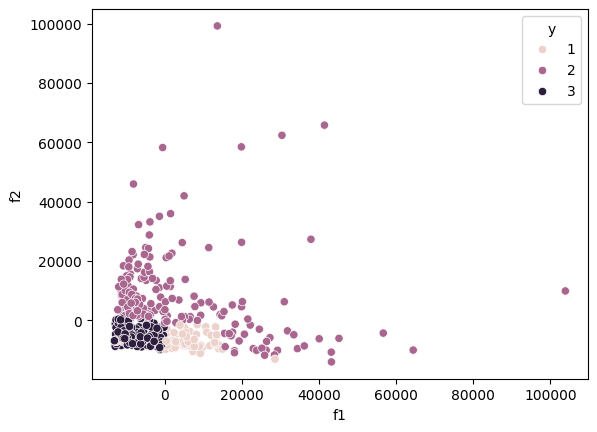

In [69]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observe**

The data is non-linear, hence to correctly classify the data:
- We will require a deep Neural Network


Splitting Data into Train, Validation and Test Data

In [70]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


Standardizing the data

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [72]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [73]:
def create_baseline():

  model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(3,activation='softmax')])
  return model

In [74]:
model = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [75]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.CategoricalCrossentropy())


In [76]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=250, batch_size=128)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 755ms/step - loss: 1.1025 - val_loss: 1.1009
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0961 - val_loss: 1.0936
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0905 - val_loss: 1.0869
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0853 - val_loss: 1.0805
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0801 - val_loss: 1.0742
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0751 - val_loss: 1.0681
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0706 - val_loss: 1.0623
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0661 - val_loss: 1.0566
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0618 - val_loss: 1.0509
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0575 - val_loss: 1.0454
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0533 - val_loss: 1.0400
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0492 - val_l

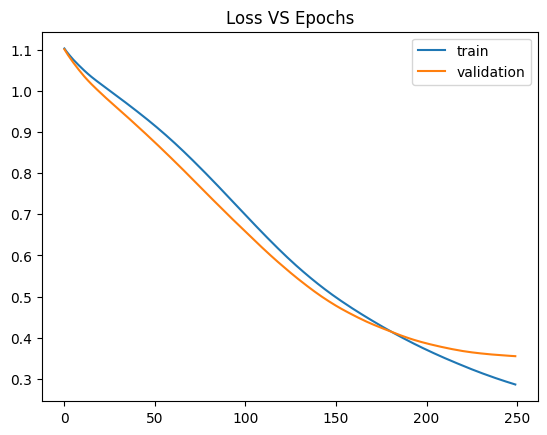

In [77]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

The model requires 210 epochs:
- For it to have such a low loss

Now imagine if the dataset has 5 million samples:
- The model will require a very high training epoch
- in order for it to reach global minima

This surely will be a huge drawback:
- While deploying the model

Lets now implement Gradient Descent with momentum on our model

In [78]:
model_gdm = create_baseline()

In [79]:
model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [80]:
history = model_gdm.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - loss: 1.1437 - val_loss: 1.1271
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.1125 - val_loss: 1.0712
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0701 - val_loss: 1.0173
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0337 - val_loss: 0.9742
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0057 - val_loss: 0.9416
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9829 - val_loss: 0.9129
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9608 - val_loss: 0.8860
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9373 - val_loss: 0.8589
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9108 - val_loss: 0.8304
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8807 - val_loss: 0.8008
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8478 - val_loss: 0.7698
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8130 - val_loss: 0.7380


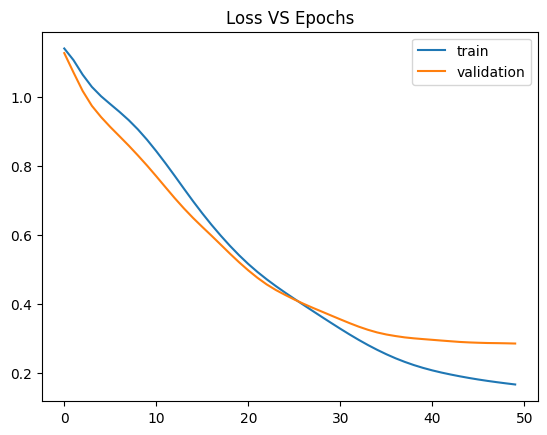

In [81]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Just by using Momentum with Gradient Descent:
- The model was able to perform so much better in just 25 epochs



Implementing Adam

In [82]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [83]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy())


Training the model with epoch = 50 and batch size = 128

In [84]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - loss: 1.1064 - val_loss: 1.0589
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0493 - val_loss: 1.0129
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0045 - val_loss: 0.9667
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9546 - val_loss: 0.9102
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8963 - val_loss: 0.8448
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8293 - val_loss: 0.7724
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7569 - val_loss: 0.6975
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6812 - val_loss: 0.6192
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6048 - val_loss: 0.5426
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5289 - val_loss: 0.4735
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4575 - val_loss: 0.4124
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3950 - val_loss: 0.3609


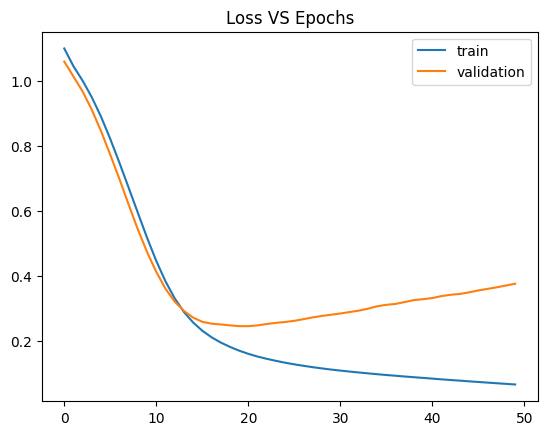

In [85]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

How using Adam algorithm,
- the oscillations are reduced drastically
- also the model takes almost 12 epochs for it to show accruate results
- But the model performance on the validation is still high
